In [1]:
import ephem
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import itertools
from astropy import units as u
from astropy.coordinates import SkyCoord
% matplotlib inline

In [2]:
# UT-3 Santiago
d = ephem.Date('2016/10/27 1:25')
print ephem.localtime(d)
print(ephem.localtime(d).ctime())

2016-10-26 22:25:00.000002
Wed Oct 26 22:25:00 2016


In [3]:
# Ajustamos la estrella
gatech = ephem.Observer()
gatech.lon, gatech.lat = '-70.64822', '-33.45694'

obj1 = ephem.readdb("HD23765,f|S|F8,3:48:28.92,21:47:50.99,9.53,2000")      # HD23765
obj2 = ephem.readdb("HD287039,f|S|F8,4:46:19.65,12:44:41.28,9.88,2000")     # HD287039
obj3 = ephem.readdb("HD89849,f|S|F8,10:22:9.84,6:13:5.84,9.15,2000")        # HD89849
obj4 = ephem.readdb("HD198044,f|S|F7,20:48:21.84,-22:-44:-26.52,7.2,2000")  # HD198044
obj5 = ephem.readdb("HD205403,f|S|F5,21:35:3.84,-3:-44:-5.64,8.02,2000")    # HD205403
obj6 = ephem.readdb("HD222891,f|S|F8,23:44:38.88,-8:-50:-55.64,8.07,2000")  # HD222891
objs = [obj1, obj2, obj3, obj4, obj5, obj6]

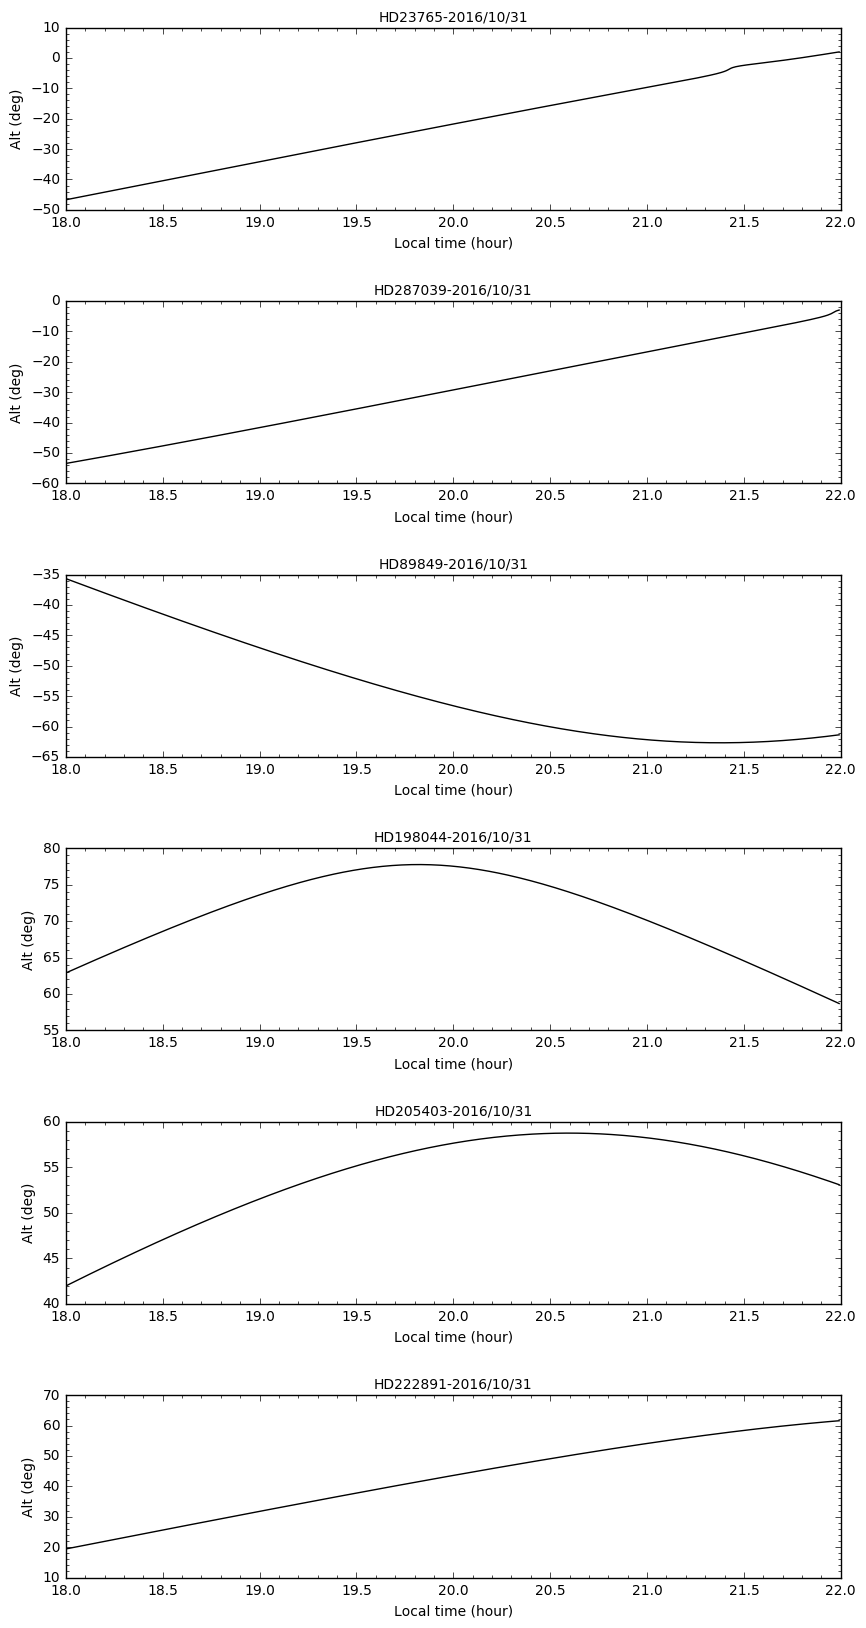

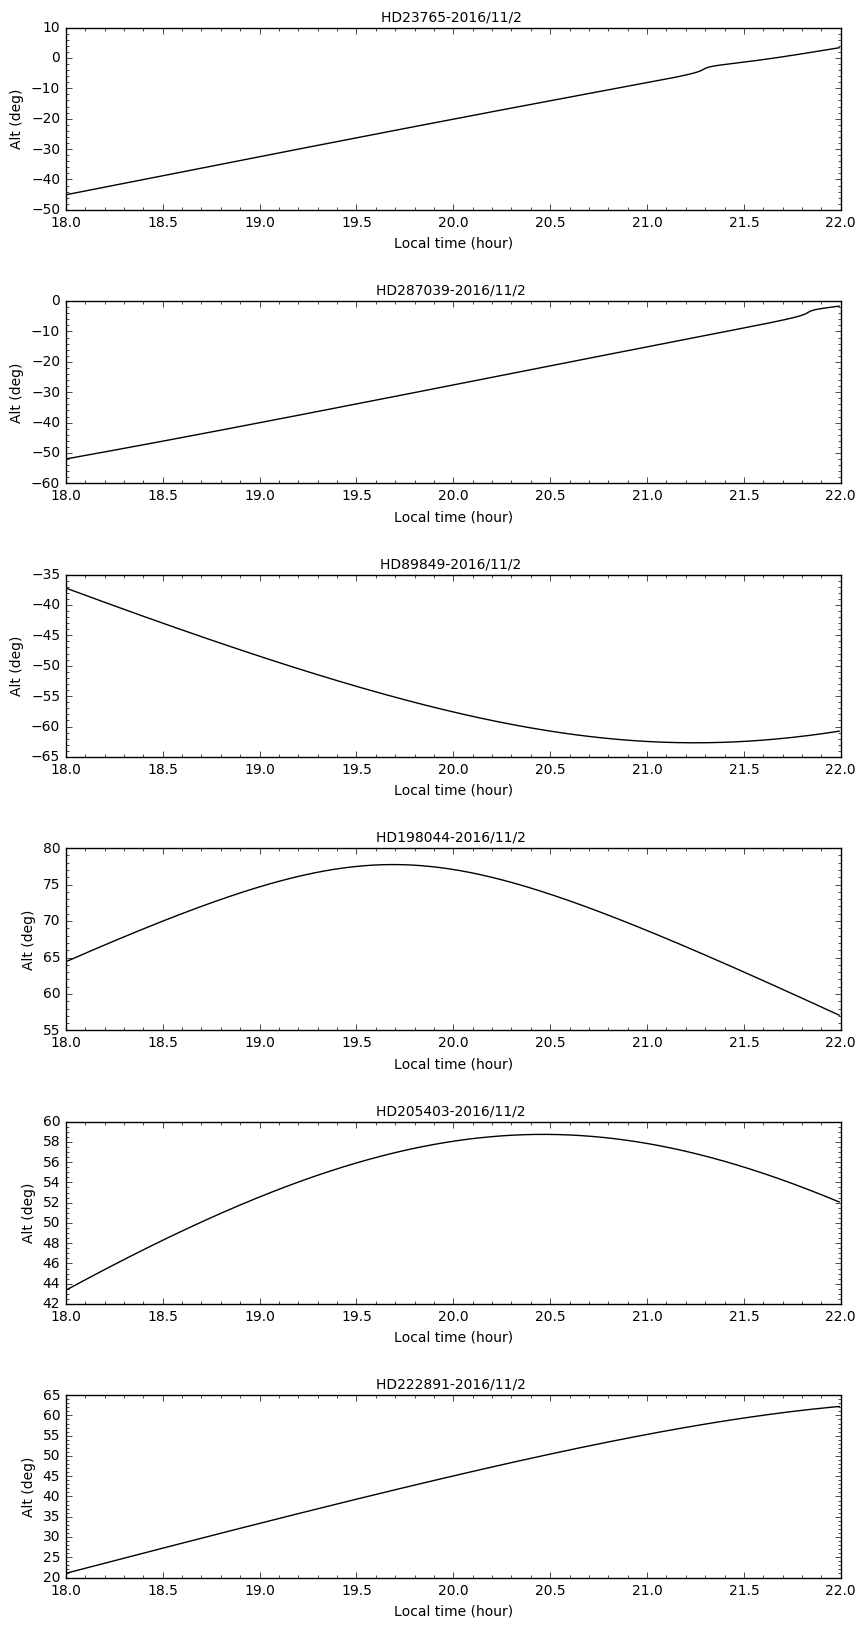

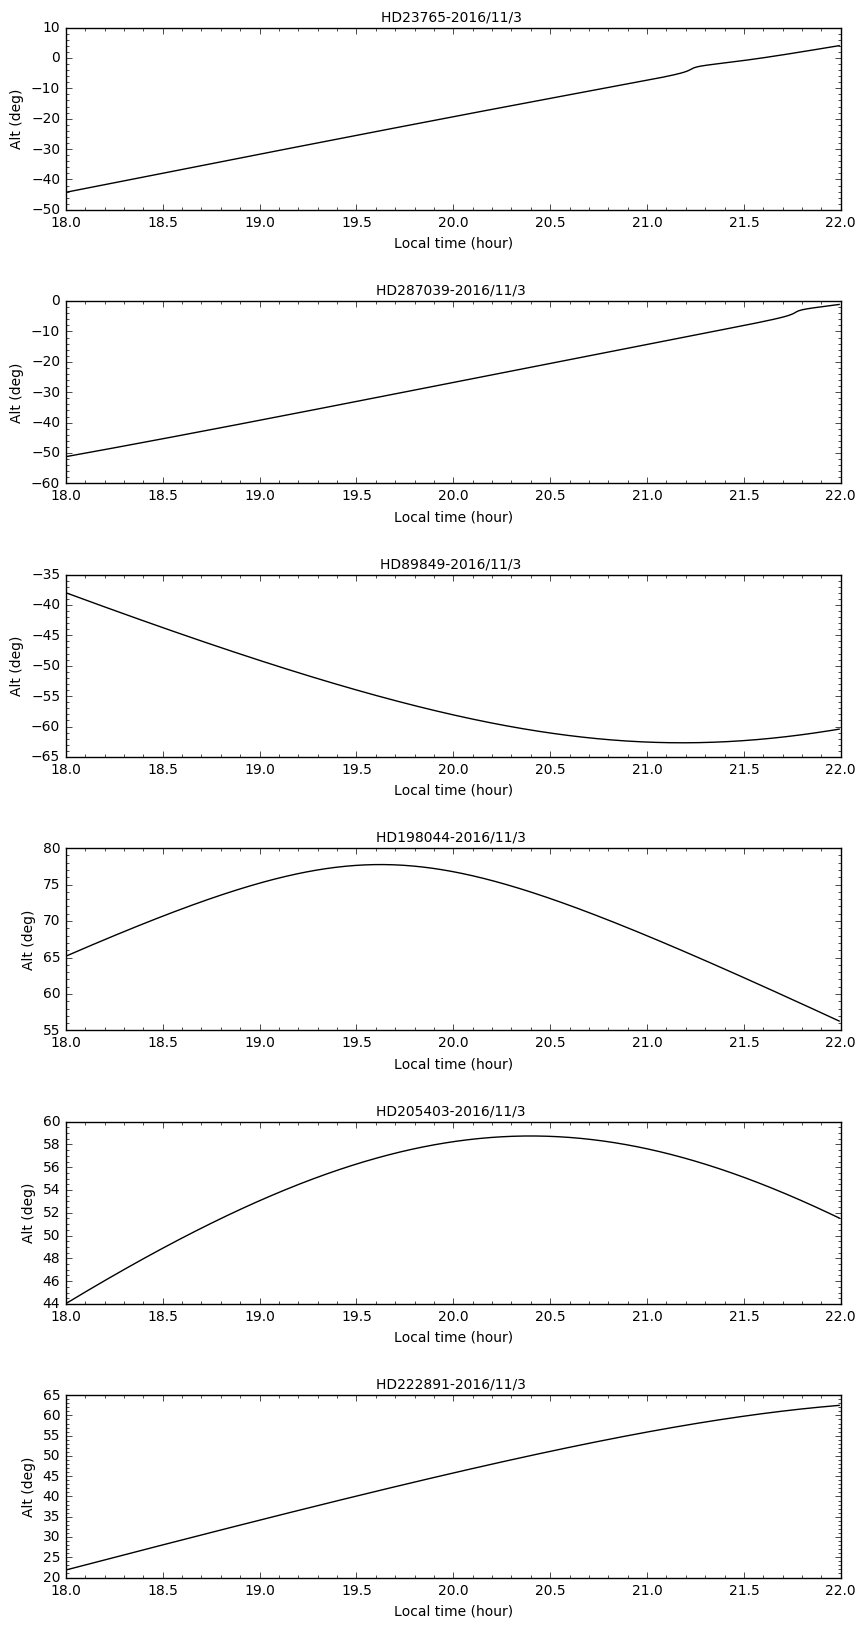

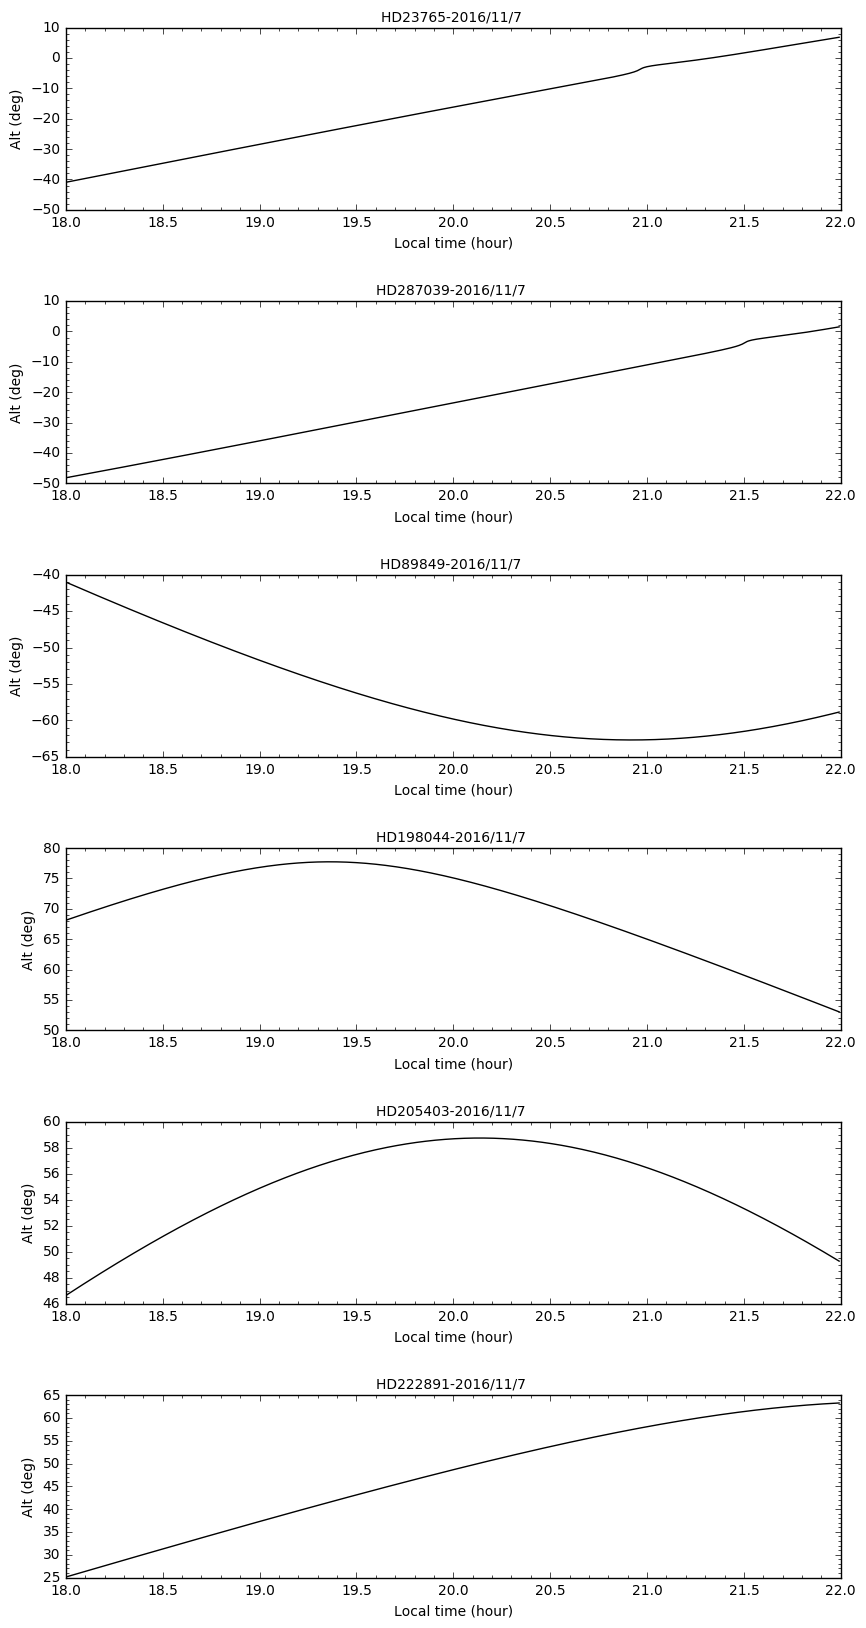

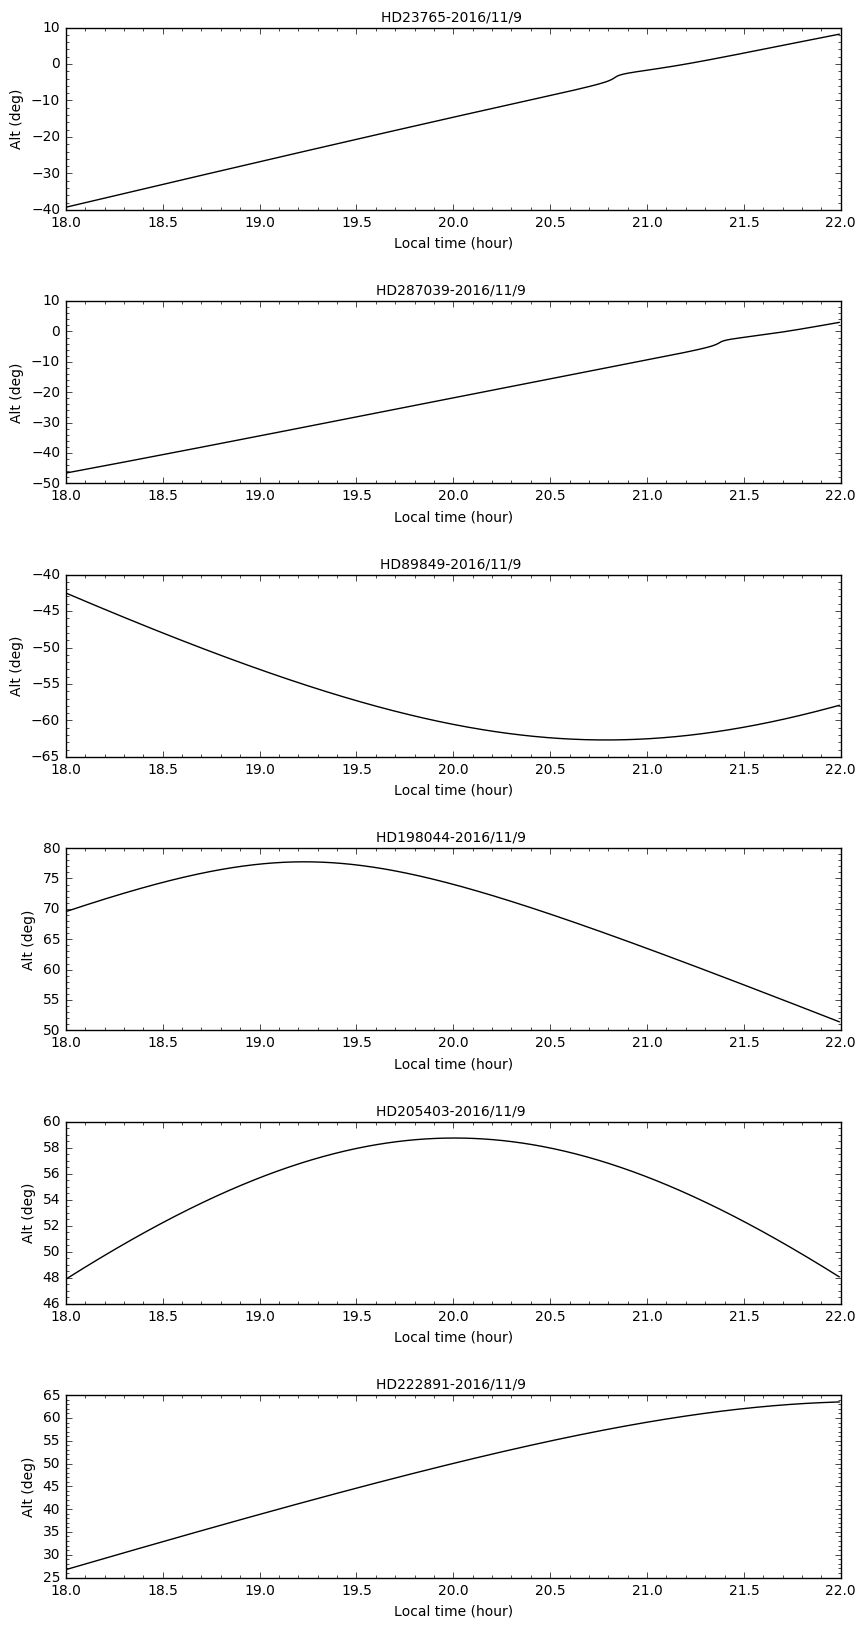

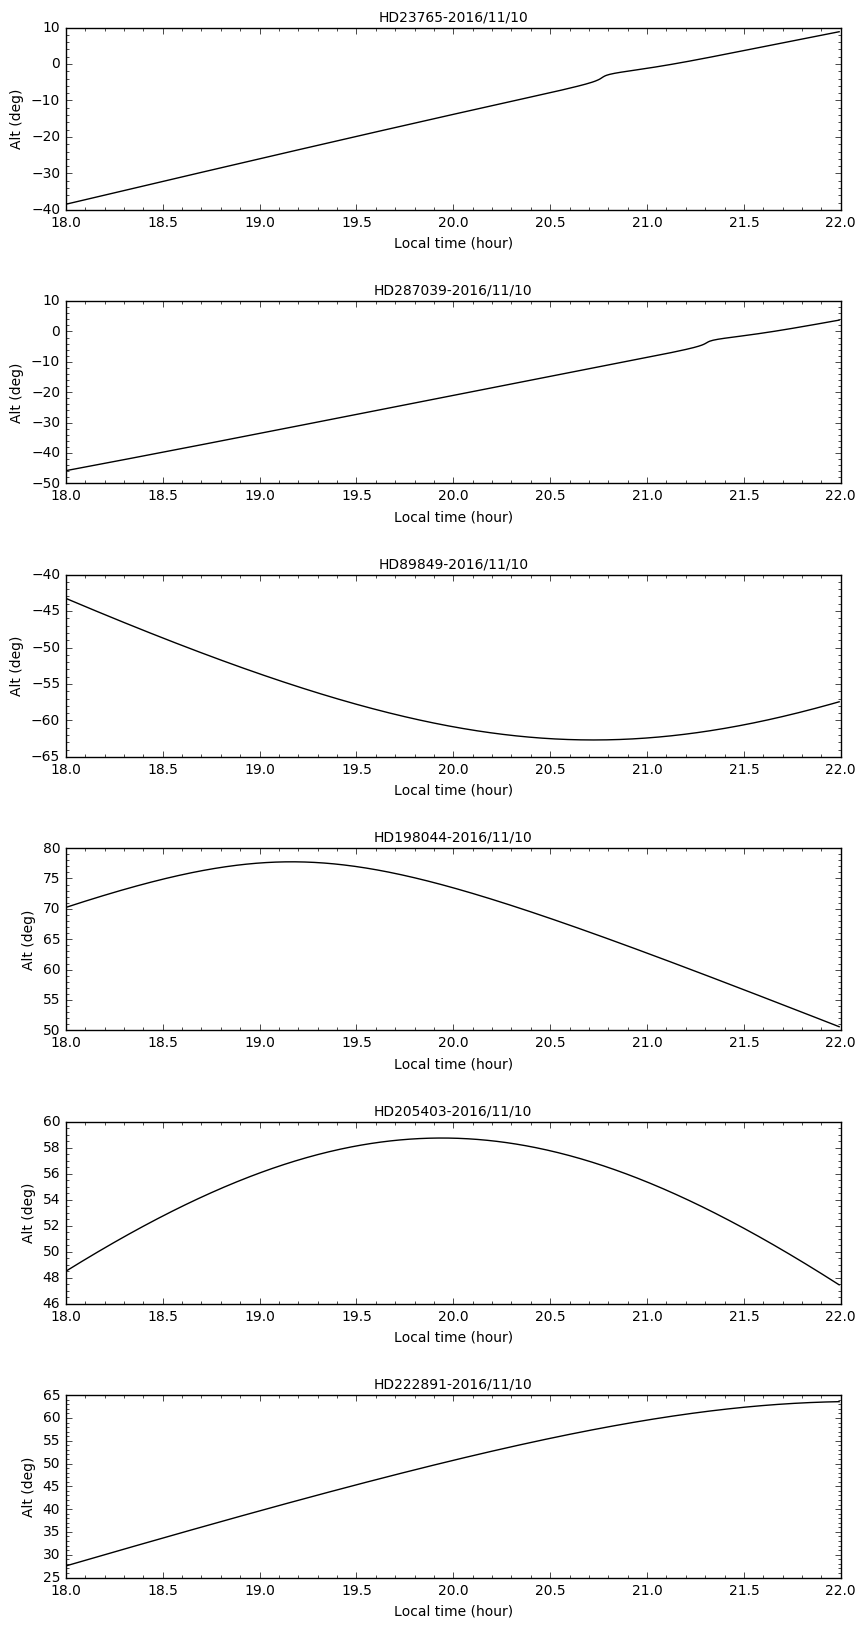

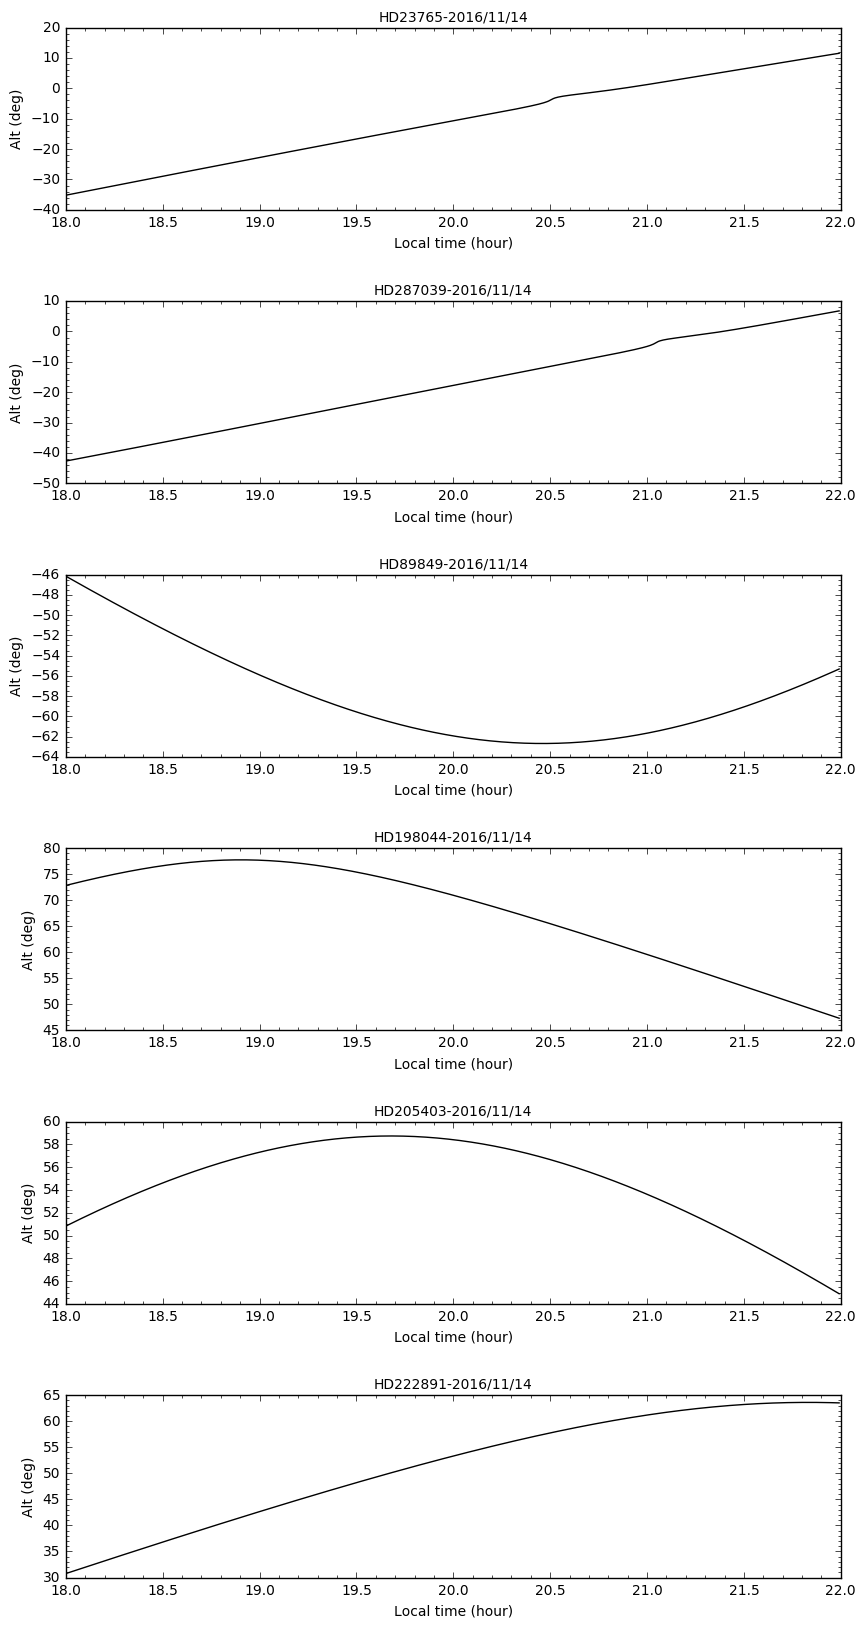

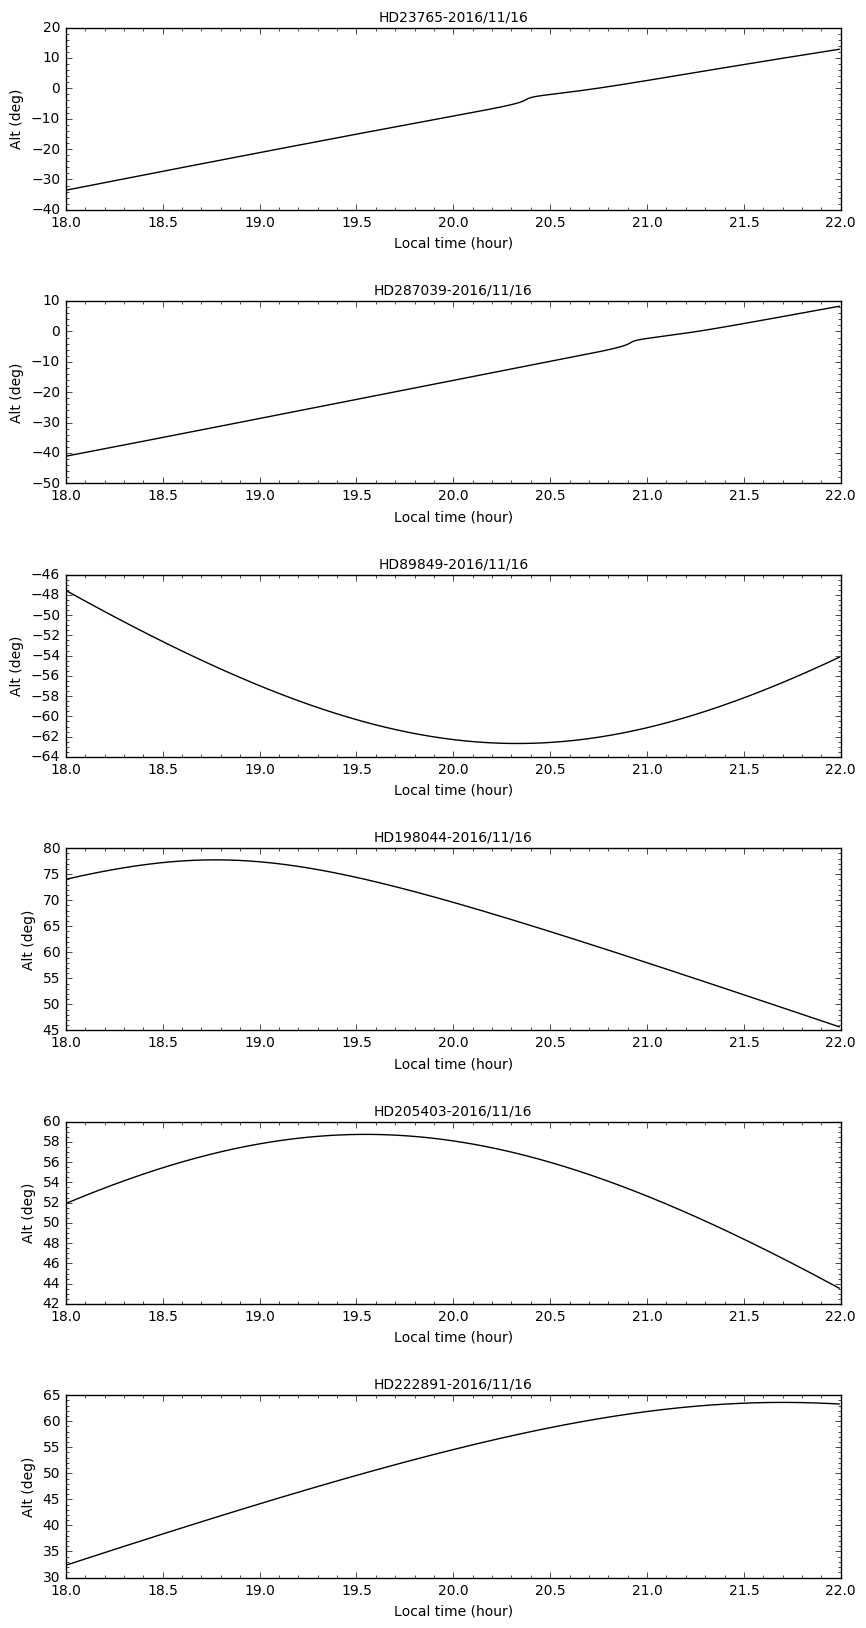

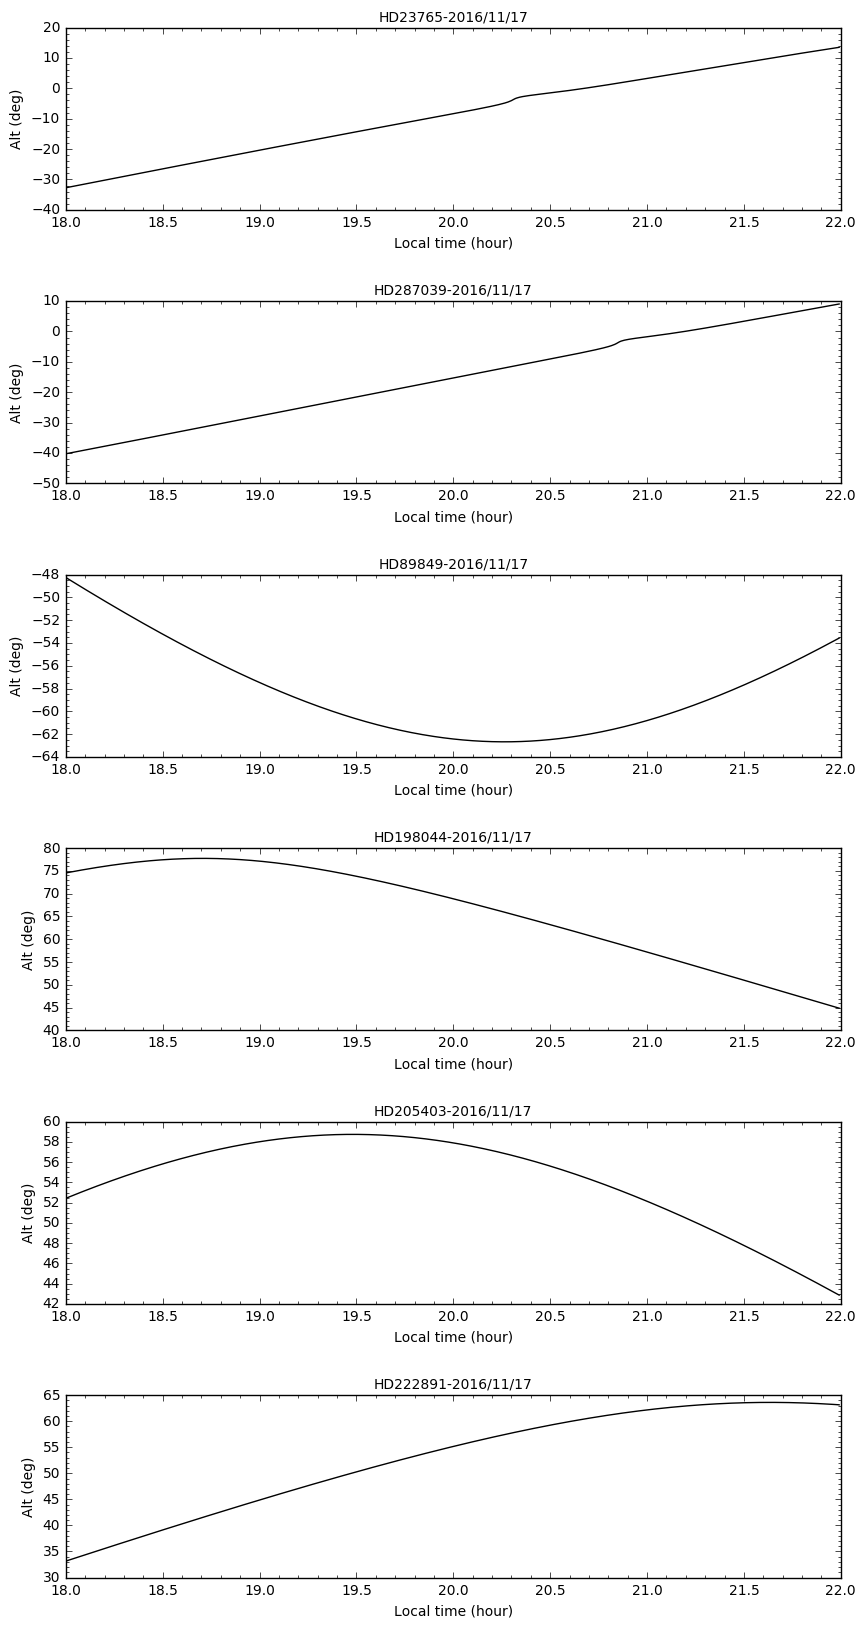

In [4]:
day_list = ['2016/10/31 21:00:00', '2016/11/2 21:00:00', '2016/11/3 21:00:00',
            '2016/11/7 21:00:00', '2016/11/9 21:00:00', '2016/11/10 21:00:00',
            '2016/11/14 21:00:00', '2016/11/16 21:00:00', '2016/11/17 21:00:00']

names = ['HD23765-', 'HD287039-', 'HD89849-', 'HD198044-', 'HD205403-','HD222891-']

l = 4
n,i = l*3600/30, 0
alt = []
time = []

for day in day_list:
    f, ax = plt.subplots(nrows = 6, figsize = [10,20])
    
    for ob, a, title in itertools.izip(objs, ax, names):
        
        gatech.date = day
        t = ephem.Date(gatech.date)
        
        while i < n:
        
            ob.compute(gatech)
            alt.append(mt.degrees(float(ob.alt)))
            h = ephem.localtime(t).hour
            m = (ephem.localtime(t).minute)/60.
            s = (ephem.localtime(t).second)/3600.
   
            time.append(h + m + s)
            gatech.date += 30 * ephem.second 
            t = ephem.Date(gatech.date)
            i += 1
            
        alt_np = np.array(alt)
        time_np = np.array(time)
        
        a.plot(time_np, alt_np, 'k-')
        a.set_xlabel('Local time (hour)', fontsize = 10)
        a.set_ylabel('Alt (deg)', fontsize = 10)
        a.set_title(title + day[:10], fontsize = 10)
        a.minorticks_on()
        time, alt, i= [], [], 0
        
    f.subplots_adjust(hspace=0.5)

In [5]:
"""
import math as mt
gatech = ephem.Observer()
gatech.lon, gatech.lat = '-70.64822', '-33.45694'
gatech.date = '2016/10/31 21:00:00' # 18:00 Santiago
sun = ephem.Sun()

#sun.compute(gatech)
#print float(sun.alt)
#print str(sun.alt)
#print mt.degrees(float(sun.alt))

h = 4
st = h*3600/30
alt = []
time = []
for i in range(st):
    sun.compute(gatech)
    alt.append(str(sun.alt))
    gatech.date += 30 * ephem.second 
"""    

"\nimport math as mt\ngatech = ephem.Observer()\ngatech.lon, gatech.lat = '-70.64822', '-33.45694'\ngatech.date = '2016/10/31 21:00:00' # 18:00 Santiago\nsun = ephem.Sun()\n\n#sun.compute(gatech)\n#print float(sun.alt)\n#print str(sun.alt)\n#print mt.degrees(float(sun.alt))\n\nh = 4\nst = h*3600/30\nalt = []\ntime = []\nfor i in range(st):\n    sun.compute(gatech)\n    alt.append(str(sun.alt))\n    gatech.date += 30 * ephem.second \n"